In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
from tqdm import tqdm
from joblib import Parallel, delayed
import csv

In [3]:

# Load the metadata CSV file
data_path = "metadata.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the DataFrame
print("DataFrame:")
df.head()

DataFrame:


,File Path,File Name,Speaker ID,Label
0,bonafide\record-1020001.wav,record-1020001.wav,record,bonafide
1,bonafide\record-10200010.wav,record-10200010.wav,record,bonafide
2,bonafide\record-10200011.wav,record-10200011.wav,record,bonafide
3,bonafide\record-10200012.wav,record-10200012.wav,record,bonafide
4,bonafide\record-10200013.wav,record-10200013.wav,record,bonafide


In [4]:
# Display basic information about the DataFrame
print("Basic Information:")
df.info()

# Display summary statistics of the DataFrame
print("Summary Statistics:")
df.describe(include='all')


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27376 entries, 0 to 27375
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   File Path   27376 non-null  object
 1   File Name   27376 non-null  object
 2   Speaker ID  27376 non-null  object
 3   Label       27376 non-null  object
dtypes: object(4)
memory usage: 855.6+ KB
Summary Statistics:


,File Path,File Name,Speaker ID,Label
count,27376,27376,27376,27376
unique,27376,27376,3,2
top,spoof\tts-030200084.wav,tts-030200084.wav,tts,spoof
freq,1,1,14499,14499


C:\Users\PAVAN KUMAR R\AppData\Local\Temp\ipykernel_13024\2562125108.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette='viridis')


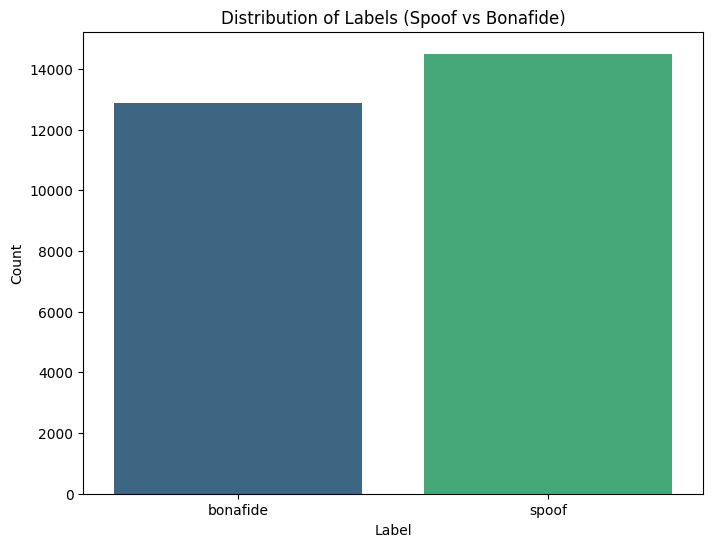

In [6]:
# Plot the distribution of labels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Label', palette='viridis')
plt.title('Distribution of Labels (Spoof vs Bonafide)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [7]:
def calculate_duration(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        return librosa.get_duration(y=y, sr=sr)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return np.nan


In [9]:
import psutil

# Function to process a batch of files and calculate durations
def process_batch(batch_df):
    batch_df['Duration'] = batch_df['File Path'].apply(calculate_duration)
    return batch_df

# Define batch size
batch_size = 10000  # Increased batch size

# Initialize an empty list to hold the processed DataFrames
processed_batches = []

# Total number of batches
num_batches = len(df) // batch_size + 1

# Function to check memory usage
def check_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss / (1024 ** 3)  # Memory usage in GB

# Process the files in batches and monitor progress
for i in range(num_batches):
    print(f"Processing Batch {i+1}/{num_batches}")
    with tqdm(total=batch_size, desc=f"Batch {i+1}") as pbar:
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(df))
        batch_df = df.iloc[start_idx:end_idx].copy()
        processed_batch = process_batch(batch_df)
        processed_batches.append(processed_batch)
        pbar.update(end_idx - start_idx)
    pbar.close()
    
    # Check memory usage after each batch
    memory_usage = check_memory()
    print(f"Memory usage after batch {i+1}: {memory_usage:.2f} GB")

# Concatenate all the processed batches into a single DataFrame
processed_df = pd.concat(processed_batches, ignore_index=True)

# Display the updated DataFrame with durations
print("Updated DataFrame with Durations:")
print(processed_df.head())

# Print the total number of batches processed
print(f"Total number of batches processed: {num_batches}")


Processing Batch 1/3


Batch 1: 100%|██████████| 10000/10000 [03:36<00:00, 46.17it/s]


Memory usage after batch 1: 0.37 GB
Processing Batch 2/3


Batch 2: 100%|██████████| 10000/10000 [02:09<00:00, 77.12it/s]


Memory usage after batch 2: 0.37 GB
Processing Batch 3/3


Batch 3:  74%|███████▍  | 7376/10000 [01:20<00:28, 91.73it/s]

Memory usage after batch 3: 0.37 GB
Updated DataFrame with Durations:
                      File Path            File Name Speaker ID     Label  \
0   bonafide\record-1020001.wav   record-1020001.wav     record  bonafide   
1  bonafide\record-10200010.wav  record-10200010.wav     record  bonafide   
2  bonafide\record-10200011.wav  record-10200011.wav     record  bonafide   
3  bonafide\record-10200012.wav  record-10200012.wav     record  bonafide   
4  bonafide\record-10200013.wav  record-10200013.wav     record  bonafide   

   Duration  
0       5.0  
1       5.0  
2       5.0  
3       5.0  
4       5.0  
Total number of batches processed: 3


In [10]:
processed_df.head()

,File Path,File Name,Speaker ID,Label,Duration
0,bonafide\record-1020001.wav,record-1020001.wav,record,bonafide,5.0
1,bonafide\record-10200010.wav,record-10200010.wav,record,bonafide,5.0
2,bonafide\record-10200011.wav,record-10200011.wav,record,bonafide,5.0
3,bonafide\record-10200012.wav,record-10200012.wav,record,bonafide,5.0
4,bonafide\record-10200013.wav,record-10200013.wav,record,bonafide,5.0


In [11]:
# Save Combined Data with Metadata to CSV
combined_data_updated_csv_path = "metadata.csv"
processed_df.to_csv(combined_data_updated_csv_path, index=False)
print("DONE")

DONE


In [12]:
import pandas as pd

# Path to your combined data CSV file
combined_data_path = "metadata.csv"

# Read the CSV file
combined_df = pd.read_csv(combined_data_path)

C:\Users\PAVAN KUMAR R\AppData\Local\Temp\ipykernel_13024\2942106010.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


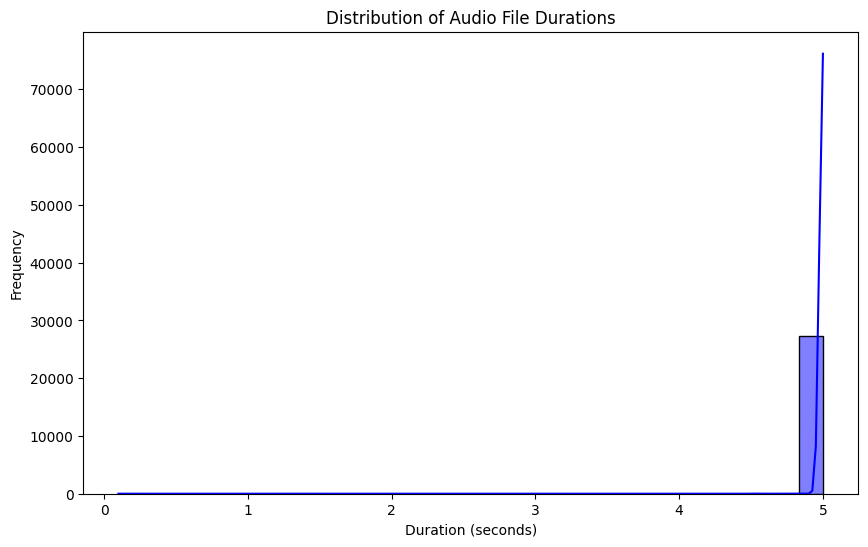

In [13]:

# Ensure that infinite values are treated as NaN
pd.set_option('mode.use_inf_as_na', True)

# Check if the 'Duration' column exists in the DataFrame
if 'Duration' in combined_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_df['Duration'].dropna(), bins=30, kde=True, color='blue')
    plt.title('Distribution of Audio File Durations')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Duration information is not available in the metadata.")

In [14]:
# Compute and plot the correlation matrix if there are numerical features
numerical_features =combined_df.select_dtypes(include=['float64', 'int64']).columns
if len(numerical_features) > 1:
    correlation_matrix = processed_df[numerical_features].corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()
else:
    print("Not enough numerical features for correlation matrix.")

Not enough numerical features for correlation matrix.


In [ ]:
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
from joblib import Parallel, delayed
import csv
import os

# Define the folder path and batch size
spoof_audio_folder = 'bonafide'

# Output CSV file for extracted features
output_file = 'bonafide_features.csv'

# Function to extract audio features
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        
        # MFCCs with delta and delta-delta
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        delta_mfcc = librosa.feature.delta(mfccs)
        delta2_mfcc = librosa.feature.delta(mfccs, order=2)
        mfcc_features = np.hstack((
            np.mean(mfccs, axis=1),
            np.mean(delta_mfcc, axis=1),
            np.mean(delta2_mfcc, axis=1)
        ))
        
        # Chromagrams
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        chroma_features = np.mean(chroma, axis=1)
        
        # Mel-Scaled Spectrograms
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
        mel_features = np.mean(mel_spectrogram, axis=1)
        
        # Spectral Contrast
        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        spectral_contrast_features = np.mean(spectral_contrast, axis=1)
        
        # Tonnetz
        tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)
        tonnetz_features = np.mean(tonnetz, axis=1)
        
        # Combine features
        features = np.hstack((
            mfcc_features, chroma_features, mel_features, spectral_contrast_features, tonnetz_features
        ))
        return features
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return np.zeros(193)

# Input: List of file paths
# Collect all file paths in the bonafide audio folder
file_paths = [
    os.path.join(spoof_audio_folder, f)
    for f in os.listdir(spoof_audio_folder) if f.endswith('.wav')
]

# Define feature names
feature_names = (
    [f'MFCC_{i}' for i in range(1, 14)] +
    [f'Delta_MFCC_{i}' for i in range(1, 14)] +
    [f'Delta2_MFCC_{i}' for i in range(1, 14)] +
    [f'Chroma_{i}' for i in range(1, 13)] +
    [f'Mel_{i}' for i in range(1, 129)] +
    [f'Spectral_Contrast_{i}' for i in range(1, 8)] +
    [f'Tonnetz_{i}' for i in range(1, 7)]
)



# Write header to the CSV file
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(feature_names)

# Batch processing
print("Starting feature extraction...")
batch_size = 1000  # Adjust this based on available memory
num_batches = len(file_paths) // batch_size + (1 if len(file_paths) % batch_size != 0 else 0)

for batch_num in range(num_batches):
    start_idx = batch_num * batch_size
    end_idx = min((batch_num + 1) * batch_size, len(file_paths))
    batch_paths = file_paths[start_idx:end_idx]
    
    # Process each batch in parallel
    batch_features = Parallel(n_jobs=-1)(
        delayed(extract_features)(file_path) for file_path in tqdm(batch_paths, desc=f"Processing batch {batch_num + 1}/{num_batches}")
    )
    
    # Append batch results to CSV
    with open(output_file, 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(batch_features)

print(f"Feature extraction completed. Features saved to {output_file}.")


Starting feature extraction...


Processing batch 1/13:   1%|          | 12/1000 [00:00<00:13, 73.98it/s]

In [2]:
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
from joblib import Parallel, delayed
import csv
import os

# Define the folder path and batch size
spoof_audio_folder = 'spoof'

# Output CSV file for extracted features
output_file = 'spoof_features.csv'

# Function to extract audio features
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        
        # MFCCs with delta and delta-delta
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        delta_mfcc = librosa.feature.delta(mfccs)
        delta2_mfcc = librosa.feature.delta(mfccs, order=2)
        mfcc_features = np.hstack((
            np.mean(mfccs, axis=1),
            np.mean(delta_mfcc, axis=1),
            np.mean(delta2_mfcc, axis=1)
        ))
        
        # Chromagrams
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        chroma_features = np.mean(chroma, axis=1)
        
        # Mel-Scaled Spectrograms
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
        mel_features = np.mean(mel_spectrogram, axis=1)
        
        # Spectral Contrast
        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        spectral_contrast_features = np.mean(spectral_contrast, axis=1)
        
        # Tonnetz
        tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)
        tonnetz_features = np.mean(tonnetz, axis=1)
        
        # Combine features
        features = np.hstack((
            mfcc_features, chroma_features, mel_features, spectral_contrast_features, tonnetz_features
        ))
        return features
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return np.zeros(193)

# Input: List of file paths
# Collect all file paths in the bonafide audio folder
file_paths = [
    os.path.join(spoof_audio_folder, f)
    for f in os.listdir(spoof_audio_folder) if f.endswith('.wav')
]

# Define feature names
feature_names = (
    [f'MFCC_{i}' for i in range(1, 14)] +
    [f'Delta_MFCC_{i}' for i in range(1, 14)] +
    [f'Delta2_MFCC_{i}' for i in range(1, 14)] +
    [f'Chroma_{i}' for i in range(1, 13)] +
    [f'Mel_{i}' for i in range(1, 129)] +
    [f'Spectral_Contrast_{i}' for i in range(1, 8)] +
    [f'Tonnetz_{i}' for i in range(1, 7)]
)



# Write header to the CSV file
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(feature_names)

# Batch processing
print("Starting feature extraction...")
batch_size = 1000  # Adjust this based on available memory
num_batches = len(file_paths) // batch_size + (1 if len(file_paths) % batch_size != 0 else 0)

for batch_num in range(num_batches):
    start_idx = batch_num * batch_size
    end_idx = min((batch_num + 1) * batch_size, len(file_paths))
    batch_paths = file_paths[start_idx:end_idx]
    
    # Process each batch in parallel
    batch_features = Parallel(n_jobs=-1)(
        delayed(extract_features)(file_path) for file_path in tqdm(batch_paths, desc=f"Processing batch {batch_num + 1}/{num_batches}")
    )
    
    # Append batch results to CSV
    with open(output_file, 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(batch_features)

print(f"Feature extraction completed. Features saved to {output_file}.")


Starting feature extraction...


Processing batch 15/15: 100%|██████████| 499/499 [00:51<00:00,  9.66it/s]


Feature extraction completed. Features saved to spoof_features.csv.
